# Machine Learning - Topic 1

**Introduction to machine learning** - **Введение в машинное обучение**

1. История появления и развития ML.
2. Основные понятия ML.
3. Исходные данные для ML.
4. Предобработка и извлечение признаков. Пример предобработки текста.
5. Типы и виды признаков.
6. Кодирование категориальных признаков. Пример кодирования.
7. Нормализация и стандартизация данных.
8. Открытые данные.
9. Ресурсы для поиска данных.
10. Сообщества по ML.
11. Что такое Kaggle. Интерфейс и возможности, ресурсы.
12. Библиотеки Python для ML.
13. Описательная статистика. Пример для набора «Ирисы Фишера».
14. Понижение размерности данных.
15. Метод главных компонент (PCA).
16. Эффективная размерность: правило сломанной трости, правило Кайзера, оценка по числу обусловленности.
17. PCA. Достоинства и недостатки, применения на практике.
18. PCA. Пример для набора «Ирисы Фишера».
19. PCA. Пример для набора «Диабет».
20. PCA. Сжатие изображений. Пример.
21. Набор «Титаник». Пример предобработки

In [19]:
from numpy.linalg import eig
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris, load_diabetes
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Min-max dataset normalization
dataset = np.array([[85,72,80], [64,35,26], [67,48,29], [100,11,102] , [130,14,151]])
diabetes_scaler = MinMaxScaler(feature_range=(-2.0, 1.5))
diabetes_scaler.fit(dataset)
normalized_dataset = diabetes_scaler.transform(dataset)
print(normalized_dataset)

[[-0.88636364  1.5        -0.488     ]
 [-2.         -0.62295082 -2.        ]
 [-1.84090909  0.12295082 -1.916     ]
 [-0.09090909 -2.          0.128     ]
 [ 1.5        -1.82786885  1.5       ]]


In [1]:
# Standard dataset normalization
standard_scaler = StandardScaler()
standard_scaler.fit(dataset)
standard_dataset = standard_scaler.transform(dataset)
print(standard_dataset)

NameError: name 'StandardScaler' is not defined

In [11]:
# Covariation and eigenvalues of matrix
cov_dataset = np.cov(dataset)
print(cov_dataset)
eig_result = eig(cov_dataset)
print(eig_result.eigenvalues)
print(eig_result.eigenvectors)

[[  43.           82.5          47.5         312.5         416.5       ]
 [  82.5         394.33333333  361.          281.          222.16666667]
 [  47.5         361.          361.          -19.         -199.5       ]
 [ 312.5         281.          -19.         2701.         3805.5       ]
 [ 416.5         222.16666667 -199.5        3805.5        5444.33333333]]
[ 8.16986616e+03 -1.79974091e-13  7.73800508e+02 -2.42808014e-14
  3.09452120e-13]
[[ 0.06416352  0.99185706  0.1100119  -0.29727908  0.00102711]
 [ 0.04377888 -0.08042272  0.69955012 -0.39564709  0.18259621]
 [-0.01981193 -0.07413933  0.67998847  0.62400855  0.08339497]
 [ 0.57336002 -0.05264844  0.14026599 -0.46491669 -0.80503419]
 [ 0.81537244 -0.03851314 -0.12832823  0.38672255  0.55823186]]


Saved information:  0.977685206318795


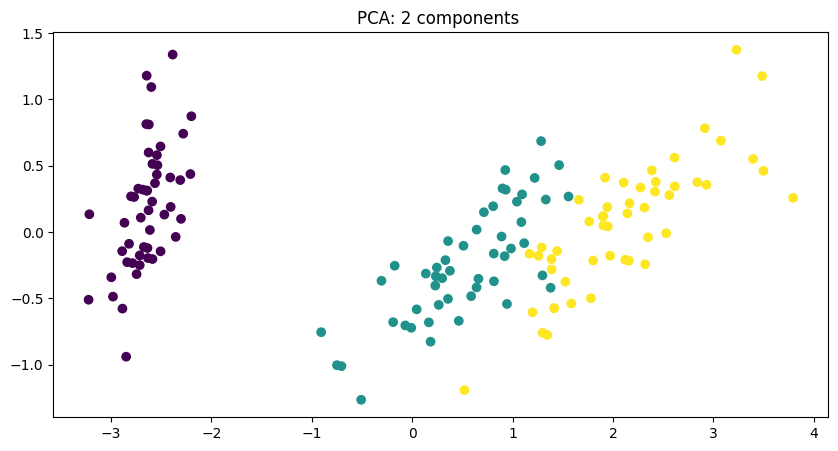

In [17]:
# PCA dimensionality reduction
iris = load_iris()
iris_X = iris.data

pca = PCA(n_components=2)

iris_X_prime = pca.fit_transform(iris_X)

f = plt.figure(figsize=(10, 5))
ax = f.add_subplot(111)
ax.scatter(iris_X_prime [:, 0], iris_X_prime[:, 1], c=iris.target)
ax.set_title("PCA: 2 components ")
print("Saved information: ", pca.explained_variance_ratio_.sum())

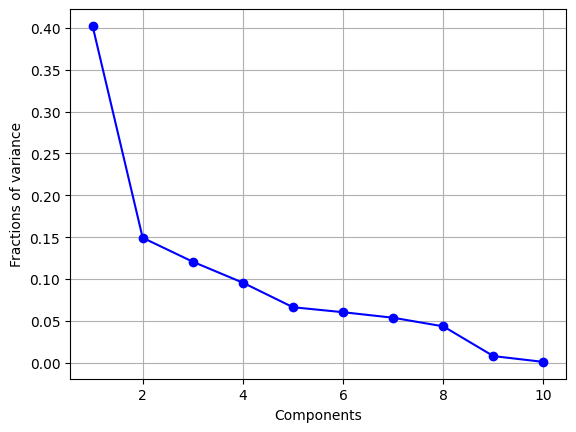

In [23]:
# PCA Elbow example
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_scaler = StandardScaler()
diabetes_scaler.fit(diabetes_df)
diabetes_scaled = diabetes_scaler.transform(diabetes_df)
dataframe_scaled = pd.DataFrame(data=diabetes_scaled, columns=diabetes.feature_names)
dataframe_scaled.head(6)

pca = PCA(n_components=10)
pca.fit_transform(diabetes_scaled)
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

PC_numbers = np.arange(pca.n_components_) + 1
plt.plot(PC_numbers, prop_var, 'bo-')
plt.xlabel('Components')
plt.ylabel('Fractions of variance')
plt.grid()
plt.show()

In [26]:
# Best PCA case
pca = PCA(n_components=2)
PC = pca.fit_transform(diabetes_scaled)

pca_diabetes = pd.DataFrame(data=PC, columns=['PC1', 'PC2'])
pca_diabetes.head(6)

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=diabetes.feature_names)
print(loadings)

          PC1       PC2
age  0.216431  0.044367
sex  0.186967 -0.386547
bmi  0.303162 -0.156281
bp   0.271738 -0.138266
s1   0.343255  0.573027
s2   0.351861  0.455942
s3  -0.282437  0.506239
s4   0.428834 -0.068181
s5   0.378618 -0.026187
s6   0.322183 -0.084949
